In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
import math
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('/content/Advertising.csv')
df.head(5)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [ ]:
X = df.iloc[:, 0:3].values
y = df.iloc[:, 3:4].values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler() 

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1)

2
0.48141171632513424
3
0.42692577397838355
4
0.3945949053198369
5
7.077230335559775
6
9.687100502580472
7
187.8120246335625
8
5086.856922379733
9
38841.294634007056
10
133593.49400317323


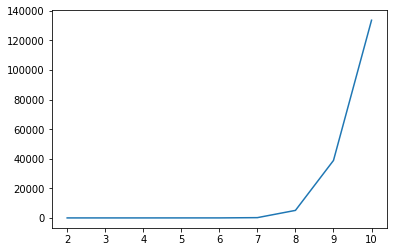

In [ ]:
min = 9999
optDegree = 0
xaxis = []
yaxis = []
for j in range(2,11):

  extra = PolynomialFeatures(j)
  extrax = extra.fit_transform(X_train)
  extraxtest = extra.fit_transform(X_test)
  polyModel = linear_model.LinearRegression().fit(extrax,y_train)
  y_pred = polyModel.predict(extraxtest)

  print(j)
  print(math.sqrt(mean_squared_error(y_test,y_pred)))

  xaxis.append(j)
  yaxis.append(math.sqrt(mean_squared_error(y_test,y_pred)))
  
  if(min>math.sqrt(mean_squared_error(y_test,y_pred))):
    min = math.sqrt(mean_squared_error(y_test,y_pred))
    optDegree = j

plt.plot(xaxis,yaxis)

In [ ]:
optDegree

4

In [ ]:
extra = PolynomialFeatures(optDegree)
extrax = extra.fit_transform(X_train)
extraxtest = extra.fit_transform(X_test)
finalModel = linear_model.LinearRegression().fit(extrax,y_train)
fmodelpredict= finalModel.predict(extraxtest)

In [ ]:
filename = 'optimal_polyreg_mode.sav'
pickle.dump(finalModel,open(filename,('wb')))

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)

In [ ]:
MAE


1.0402154012924725

In [ ]:
MSE

1.9918855518287881

In [ ]:
RMSE

1.4113417558581578

In [ ]:
ridge_cv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')

In [ ]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), scoring='neg_mean_absolute_error')

In [ ]:
test_predictions = ridge_cv_model.predict(X_test)

In [ ]:
MSE = mean_squared_error(test_predictions,y_test)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test,test_predictions)

In [ ]:
MSE

1.9918966640524616

In [ ]:
RMSE

1.411345692611297

In [ ]:
MAE

1.040218282366869

In [ ]:
model.predict([[149,22,12]])

array([[13.84657919]])

In [ ]:
ridge_cv_model.predict([[149,22,12]])

array([[13.84657692]])

In [ ]:
extra = PolynomialFeatures(optDegree)
extrax = extra.fit_transform([[149,22,12]])
print(optDegree)

4


In [ ]:
finalModel.predict(extrax)

array([[14.34395329]])